# A/B Test #3

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [4]:
df = pd.read_excel('Downloads/916702-XLS-ENG.xlsx', sheet_name='ads_analysis%202_1fd2e6d3-bf38-')
df.head()

,treatment,pageviews,calls,reservations,business_id,restaurant_type
0,0,643,44,39,1,chain
1,0,621,41,44,2,chain
2,0,581,40,38,3,chain
3,0,592,35,31,4,chain
4,0,648,45,46,5,chain


In [5]:
df.dtypes

treatment           int64
pageviews           int64
calls               int64
reservations        int64
business_id         int64
restaurant_type    object
dtype: object

In [7]:
# checl for dups
df['business_id'].duplicated().sum()

0

In [9]:
df['pageviews'].groupby(df['restaurant_type']).mean()

restaurant_type
chain          660.179667
independent    339.980889
Name: pageviews, dtype: float64

In [10]:
df['pageviews'].groupby(df['treatment']).mean()

treatment
0    419.7794
1    501.1908
2    483.2110
Name: pageviews, dtype: float64

In [11]:
df['calls'].groupby(df['treatment']).mean()

treatment
0    34.0196
1    37.3885
2    41.7145
Name: calls, dtype: float64

In [12]:
df['reservations'].groupby(df['treatment']).mean()

treatment
0    33.9604
1    34.0212
2    41.6805
Name: reservations, dtype: float64

### Statistical Tests

In [20]:
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu

In [45]:
df['pageviews'].groupby(df['treatment']).mean()

treatment
0    419.7794
1    501.1908
2    483.2110
Name: pageviews, dtype: float64

In [34]:
# Step 1: Check Assumptions
# Normality assumption
shapiro_stat_0, shapiro_p_value_0 = shapiro(df[df['treatment'] == 0]['pageviews'])
shapiro_stat_1, shapiro_p_value_1 = shapiro(df[df['treatment'] == 1]['pageviews'])
shapiro_stat_2, shapiro_p_value_2 = shapiro(df[df['treatment'] == 2]['pageviews'])

print(f"Shapiro-Wilk test for normality (control group - 0): p-value = {shapiro_p_value_0}")
print(f"Shapiro-Wilk test for normality (1st ad group - 1): p-value = {shapiro_p_value_1}")
print(f"Shapiro-Wilk test for normality (2nd ad group - 2): p-value = {shapiro_p_value_2}")

# Equality of variances assumption
levene_stat, levene_p_value = levene(df[df['treatment'] == 0]['pageviews'], df[df['treatment'] == 1]['pageviews'], df[df['treatment'] == 2]['pageviews'])
print(f"Levene's test for equality of variances: p-value = {levene_p_value}")

Shapiro-Wilk test for normality (control group - 0): p-value = 0.0
Shapiro-Wilk test for normality (1st ad group - 1): p-value = 0.0
Shapiro-Wilk test for normality (2nd ad group - 2): p-value = 0.0
Levene's test for equality of variances: p-value = 1.3878167549631816e-25


C:\Users\abdul\anaconda3\envs\ISLP\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


the variable is not normally distributed, thus we cannot use the T-test

In [28]:
# Step 2: Perform a Suitable Test
alpha = 0.05
if shapiro_p_value_0 > alpha and shapiro_p_value_1 > alpha and shapiro_p_value_2 > alpha and levene_p_value > alpha:
    # Assumptions met - use t-test for means between all treatment pairs
    t_stat_01, t_p_value_01 = ttest_ind(df[df['treatment'] == 0]['pageviews'], df[df['treatment'] == 1]['pageviews'])
    t_stat_02, t_p_value_02 = ttest_ind(df[df['treatment'] == 0]['pageviews'], df[df['treatment'] == 2]['pageviews'])
    t_stat_12, t_p_value_12 = ttest_ind(df[df['treatment'] == 1]['pageviews'], df[df['treatment'] == 2]['pageviews'])

    print(f"Independent two-sample t-test for treatment 0 vs 1: p-value = {t_p_value_01}")
    print(f"Independent two-sample t-test for treatment 0 vs 2: p-value = {t_p_value_02}")
    print(f"Independent two-sample t-test for treatment 1 vs 2: p-value = {t_p_value_12}")
else:
    # Assumptions not met - use Mann-Whitney U test for medians between all treatment pairs
    u_stat_01, u_p_value_01 = mannwhitneyu(df[df['treatment'] == 0]['pageviews'], df[df['treatment'] == 1]['pageviews'])
    u_stat_02, u_p_value_02 = mannwhitneyu(df[df['treatment'] == 0]['pageviews'], df[df['treatment'] == 2]['pageviews'])
    u_stat_12, u_p_value_12 = mannwhitneyu(df[df['treatment'] == 1]['pageviews'], df[df['treatment'] == 2]['pageviews'])

    print(f"Mann-Whitney U test for treatment 0 vs 1: p-value = {u_p_value_01}")
    print(f"Mann-Whitney U test for treatment 0 vs 2: p-value = {u_p_value_02}")
    print(f"Mann-Whitney U test for treatment 1 vs 2: p-value = {u_p_value_12}")

Mann-Whitney U test for treatment 0 vs 1: p-value = 0.0
Mann-Whitney U test for treatment 0 vs 2: p-value = 0.0
Mann-Whitney U test for treatment 1 vs 2: p-value = 1.7406085543278967e-62


In [26]:
df.head()

,treatment,pageviews,calls,reservations,business_id,restaurant_type
0,0,643,44,39,1,chain
1,0,621,41,44,2,chain
2,0,581,40,38,3,chain
3,0,592,35,31,4,chain
4,0,648,45,46,5,chain


In [43]:
df['calls'].groupby(df['treatment']).mean()

treatment
0    34.0196
1    37.3885
2    41.7145
Name: calls, dtype: float64

In [35]:
# Step 1: Check Assumptions
# Normality assumption
shapiro_stat_0, shapiro_p_value_0 = shapiro(df[df['treatment'] == 0]['calls'])
shapiro_stat_1, shapiro_p_value_1 = shapiro(df[df['treatment'] == 1]['calls'])
shapiro_stat_2, shapiro_p_value_2 = shapiro(df[df['treatment'] == 2]['calls'])

print(f"Shapiro-Wilk test for normality (control group - 0): p-value = {shapiro_p_value_0}")
print(f"Shapiro-Wilk test for normality (1st ad group - 1): p-value = {shapiro_p_value_1}")
print(f"Shapiro-Wilk test for normality (2nd ad group - 2): p-value = {shapiro_p_value_2}")

# Equality of variances assumption
levene_stat, levene_p_value = levene(df[df['treatment'] == 0]['calls'], df[df['treatment'] == 1]['calls'], df[df['treatment'] == 2]['calls'])
print(f"Levene's test for equality of variances: p-value = {levene_p_value}")

Shapiro-Wilk test for normality (control group - 0): p-value = 2.6618201728932008e-34
Shapiro-Wilk test for normality (1st ad group - 1): p-value = 6.014846176926773e-35
Shapiro-Wilk test for normality (2nd ad group - 2): p-value = 0.0
Levene's test for equality of variances: p-value = 5.332043723768382e-35


C:\Users\abdul\anaconda3\envs\ISLP\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


the variable is not normally distributed, thus we cannot use the T-test

In [44]:
# Step 2: Perform a Suitable Test
if shapiro_p_value_0 > alpha and shapiro_p_value_1 > alpha and shapiro_p_value_2 > alpha and levene_p_value > alpha:
# Assumptions met - use t-test for means between all treatment pairs
    t_stat_01, t_p_value_01 = ttest_ind(df[df['treatment'] == 0]['calls'], df[df['treatment'] == 1]['calls'])
    t_stat_02, t_p_value_02 = ttest_ind(df[df['treatment'] == 0]['calls'], df[df['treatment'] == 2]['calls'])
    t_stat_12, t_p_value_12 = ttest_ind(df[df['treatment'] == 1]['calls'], df[df['treatment'] == 2]['calls'])

    print(f"Independent two-sample t-test for treatment 0 vs 1: p-value = {t_p_value_01}")
    print(f"Independent two-sample t-test for treatment 0 vs 2: p-value = {t_p_value_02}")
    print(f"Independent two-sample t-test for treatment 1 vs 2: p-value = {t_p_value_12}")
else:
    # Assumptions not met - use Mann-Whitney U test for medians between all treatment pairs
    u_stat_01, u_p_value_01 = mannwhitneyu(df[df['treatment'] == 0]['calls'], df[df['treatment'] == 1]['calls'])
    u_stat_02, u_p_value_02 = mannwhitneyu(df[df['treatment'] == 0]['calls'], df[df['treatment'] == 2]['calls'])
    u_stat_12, u_p_value_12 = mannwhitneyu(df[df['treatment'] == 1]['calls'], df[df['treatment'] == 2]['calls'])

    print(f"Mann-Whitney U test for treatment 0 vs 1: p-value = {u_p_value_01}")
    print(f"Mann-Whitney U test for treatment 0 vs 2: p-value = {u_p_value_02}")
    print(f"Mann-Whitney U test for treatment 1 vs 2: p-value = {u_p_value_12}")

Mann-Whitney U test for treatment 0 vs 1: p-value = 3.951413462615891e-233
Mann-Whitney U test for treatment 0 vs 2: p-value = 0.0
Mann-Whitney U test for treatment 1 vs 2: p-value = 1.7119092054491197e-293


In [41]:
df['reservations'].groupby(df['treatment']).mean()

treatment
0    33.9604
1    34.0212
2    41.6805
Name: reservations, dtype: float64

In [37]:
# Step 1: Check Assumptions
# Normality assumption
shapiro_stat_0, shapiro_p_value_0 = shapiro(df[df['treatment'] == 0]['reservations'])
shapiro_stat_1, shapiro_p_value_1 = shapiro(df[df['treatment'] == 1]['reservations'])
shapiro_stat_2, shapiro_p_value_2 = shapiro(df[df['treatment'] == 2]['reservations'])

print(f"Shapiro-Wilk test for normality (control group - 0): p-value = {shapiro_p_value_0}")
print(f"Shapiro-Wilk test for normality (1st ad group - 1): p-value = {shapiro_p_value_1}")
print(f"Shapiro-Wilk test for normality (2nd ad group - 2): p-value = {shapiro_p_value_2}")

# Equality of variances assumption
levene_stat, levene_p_value = levene(df[df['treatment'] == 0]['reservations'], df[df['treatment'] == 1]['reservations'], df[df['treatment'] == 2]['reservations'])
print(f"Levene's test for equality of variances: p-value = {levene_p_value}")

Shapiro-Wilk test for normality (control group - 0): p-value = 1.6540165197004436e-34
Shapiro-Wilk test for normality (1st ad group - 1): p-value = 9.684373686948811e-42
Shapiro-Wilk test for normality (2nd ad group - 2): p-value = 0.0
Levene's test for equality of variances: p-value = 8.658925249717472e-59


In [38]:
# Step 2: Perform a Suitable Test
if shapiro_p_value_0 > alpha and shapiro_p_value_1 > alpha and shapiro_p_value_2 > alpha and levene_p_value > alpha:
# Assumptions met - use t-test for means between all treatment pairs
    t_stat_01, t_p_value_01 = ttest_ind(df[df['treatment'] == 0]['reservations'], df[df['treatment'] == 1]['reservations'])
    t_stat_02, t_p_value_02 = ttest_ind(df[df['treatment'] == 0]['reservations'], df[df['treatment'] == 2]['reservations'])
    t_stat_12, t_p_value_12 = ttest_ind(df[df['treatment'] == 1]['reservations'], df[df['treatment'] == 2]['reservations'])

    print(f"Independent two-sample t-test for treatment 0 vs 1: p-value = {t_p_value_01}")
    print(f"Independent two-sample t-test for treatment 0 vs 2: p-value = {t_p_value_02}")
    print(f"Independent two-sample t-test for treatment 1 vs 2: p-value = {t_p_value_12}")
else:
    # Assumptions not met - use Mann-Whitney U test for medians between all treatment pairs
    u_stat_01, u_p_value_01 = mannwhitneyu(df[df['treatment'] == 0]['reservations'], df[df['treatment'] == 1]['reservations'])
    u_stat_02, u_p_value_02 = mannwhitneyu(df[df['treatment'] == 0]['reservations'], df[df['treatment'] == 2]['reservations'])
    u_stat_12, u_p_value_12 = mannwhitneyu(df[df['treatment'] == 1]['reservations'], df[df['treatment'] == 2]['reservations'])

    print(f"Mann-Whitney U test for treatment 0 vs 1: p-value = {u_p_value_01}")
    print(f"Mann-Whitney U test for treatment 0 vs 2: p-value = {u_p_value_02}")
    print(f"Mann-Whitney U test for treatment 1 vs 2: p-value = {u_p_value_12}")

Mann-Whitney U test for treatment 0 vs 1: p-value = 0.9499822319289795
Mann-Whitney U test for treatment 0 vs 2: p-value = 0.0
Mann-Whitney U test for treatment 1 vs 2: p-value = 0.0


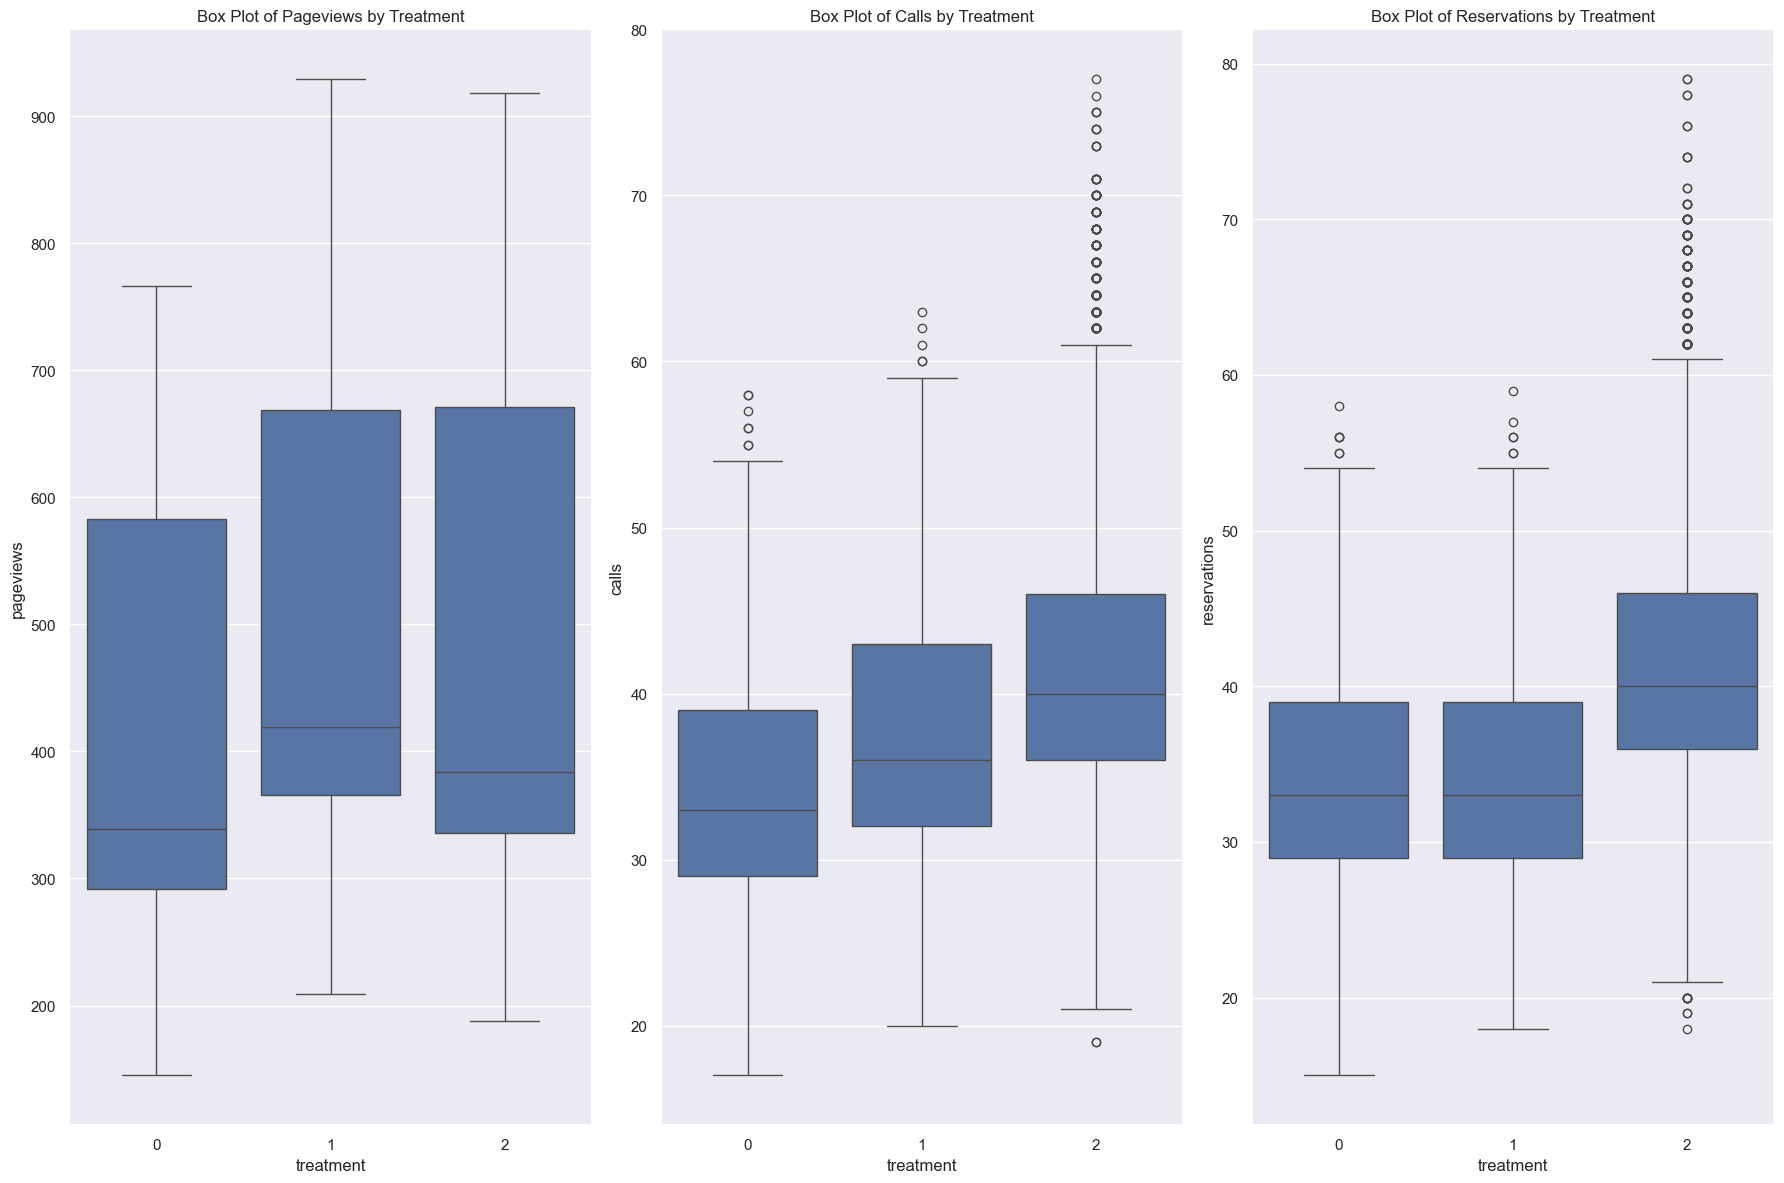

In [47]:
# Box plots for multiple variables grouped by treatment
plt.figure(figsize=(18, 12))
plt.subplot(1, 3, 1)
sns.boxplot(x='treatment', y='pageviews', data=df)
plt.title('Box Plot of Pageviews by Treatment')

plt.subplot(1, 3, 2)
sns.boxplot(x='treatment', y='calls', data=df)
plt.title('Box Plot of Calls by Treatment')

plt.subplot(1, 3, 3)
sns.boxplot(x='treatment', y='reservations', data=df)
plt.title('Box Plot of Reservations by Treatment')

plt.tight_layout()
plt.show()

In [51]:
import scipy.stats as stats

# Perform A/B testing for each metric between the treatment groups
metrics = ['pageviews', 'calls', 'reservations']

# Separate data by treatment group
control_group = df[df['treatment'] == 0]
current_ads_group = df[df['treatment'] == 1]
alternative_ads_group = df[df['treatment'] == 2]

# Initialize dictionary to store results
ab_test_results = {}

# Conduct two-sample t-tests between groups for each metric
for metric in metrics:
    control_vs_current = stats.ttest_ind(control_group[metric], current_ads_group[metric], equal_var=False)
    control_vs_alternative = stats.ttest_ind(control_group[metric], alternative_ads_group[metric], equal_var=False)
    current_vs_alternative = stats.ttest_ind(current_ads_group[metric], alternative_ads_group[metric], equal_var=False)

    ab_test_results[metric] = {
        'Control vs Current Ads': control_vs_current.pvalue,
        'Control vs Alternative Ads': control_vs_alternative.pvalue,
        'Current Ads vs Alternative Ads': current_vs_alternative.pvalue,
    }

# Convert results to DataFrame for easier interpretation
ab_test_results_df = pd.DataFrame(ab_test_results)

ab_test_results_df

,pageviews,calls,reservations
Control vs Current Ads,1.495271e-280,2.513056e-256,0.511446
Control vs Alternative Ads,2.553251e-159,0.000000e+00,0.000000
Current Ads vs Alternative Ads,7.327728e-14,0.000000e+00,0.000000


In [57]:
print(ab_test_results_df.round(5))

                                pageviews  calls  reservations
Control vs Current Ads                0.0    0.0       0.51145
Control vs Alternative Ads            0.0    0.0       0.00000
Current Ads vs Alternative Ads        0.0    0.0       0.00000
